## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |
|Rodolfo Simões        |2215080073 |

### Tarefa de aprendizado - Random Forest

In [158]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
import joblib
import os


In [159]:
# Criar pasta 'random_forest' para armazenar os modelos treinados:
os.makedirs('random_forest', exist_ok = True)

In [160]:
# Importando o Dataset ajustado para treino:

df = pd.read_csv("datasets/updated_pollution_dataset_encoded.csv")
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [161]:
# Separação dos conjuntos
X = df.drop('Air Quality Encoded', axis = 1)
y = df['Air Quality Encoded']

target_classes = ["Good", "Moderate", "Poor", "Hazardous"]

In [162]:
# Separando em dados de treino e teste (80% = treino / 20% = teste)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

=== Resultados de Avaliação ===
Acurácia:  95.10%
Precisão:  93.16%
Recall:    91.42%
F1-Score:  92.19%


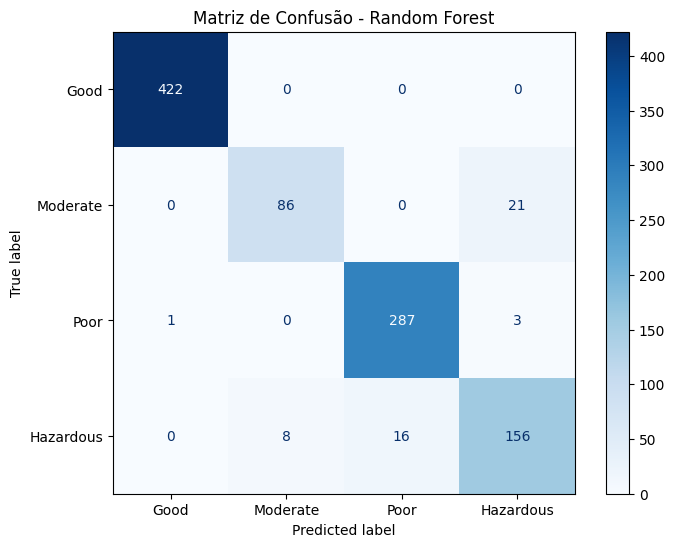

In [163]:
# Teste simples - modelo padrão de Random Forest:

clf = RandomForestClassifier(random_state = 34)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Métricas de avaliação
accuracy_p = accuracy_score(y_test, y_pred)
precision_p = precision_score(y_test, y_pred, average = 'macro')  # macro para multiclasse
recall_p = recall_score(y_test, y_pred, average = 'macro')
f1_p = f1_score(y_test, y_pred, average = 'macro')

print("=== Resultados de Avaliação ===")
print(f"Acurácia:  {accuracy_p * 100:.2f}%")
print(f"Precisão:  {precision_p * 100:.2f}%")
print(f"Recall:    {recall_p * 100:.2f}%")
print(f"F1-Score:  {f1_p * 100:.2f}%")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_classes)
fig, ax = plt.subplots(figsize = (8, 6))
disp.plot(ax=  ax, cmap = 'Blues', colorbar = True)

plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [164]:
# Salvando o arquivo do modelo de Random Forest padrão:
joblib.dump(clf, 'random_forest/random_forest_air_quality_standard.joblib')

['random_forest/random_forest_air_quality_standard.joblib']

### Aprofundando o treinamento: Utilização do GridSearch

O GridSearchCV é uma técnica de busca sistemática que testa todas as combinações possíveis de hiperparâmetros fornecidos para um modelo e avalia cada combinação usando validação cruzada (cross-validation). 

Essa abordagem é útil porque evita escolhas arbitrárias de parâmetros e ajuda a encontrar automaticamente a configuração que maximiza o desempenho do modelo (como acurácia ou F1-score) no conjunto de validação. 

Essa técnica é bem adequada para o Random Forest, porque esse algoritmo possui vários hiperparâmetros que influenciam diretamente a profundidade, número de árvores e balanceamento do modelo, tornando a escolha manual ineficiente e arriscada. O GridSearchCV assegura que a seleção dos melhores hiperparâmetros seja baseada em evidências estatísticas robustas em vez de realizar tentativa e erro manualmente.

In [165]:
# Utilizando o GridSearchCV para encontrar os melhores parâmetros:

param_grid = {
    'n_estimators': [50, 100, 150, 200],     # Número de árvores na floresta (padrão é 100)
    'max_depth': [None, 10, 20, 25, 30],    # Profundidade máxima das árvores
    'min_samples_split': [2, 3, 5, 10],    # Mínimo de amostras necessário para dividir um nó
    'min_samples_leaf': [1, 2, 4],      # Mínimo de amostras por folha
    'bootstrap': [True, False]          # Usar ou não amostragem com reposição
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 34),
                           param_grid = param_grid,
                           cv = 5,  # 5-fold cross-validation
                           n_jobs = -1,  # usa todos os núcleos da cpu
                           scoring = 'f1_macro',  # para multiclasse
                           verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=34), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro', verbose=2)

In [166]:
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print(f"Melhor F1-score médio: {grid_search.best_score_ * 100:.2f}%")


Melhores parâmetros encontrados: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Melhor F1-score médio: 93.75%


In [167]:
# Treinando o modelo com os melhores parâmetros encontrados pelo GridSearchCV:

final_model = RandomForestClassifier(**grid_search.best_params_, random_state = 34)
final_model.fit(X_train, y_train)

# Avaliar no conjunto de teste real
y_final_pred = final_model.predict(X_test)

# Métricas de avaliação
accuracy_g = accuracy_score(y_test, y_final_pred)
precision_g = precision_score(y_test, y_final_pred, average = 'macro')  # macro para multiclasse
recall_g = recall_score(y_test, y_final_pred, average = 'macro')
f1_g = f1_score(y_test, y_final_pred, average = 'macro')

print("=== Resultados de Avaliação ===")
print(f"Acurácia:  {accuracy_g * 100:.2f}%")
print(f"Precisão:  {precision_g * 100:.2f}%")
print(f"Recall:    {recall_g * 100:.2f}%")
print(f"F1-Score:  {f1_g * 100:.2f}%")


=== Resultados de Avaliação ===
Acurácia:  94.90%
Precisão:  93.20%
Recall:    91.00%
F1-Score:  91.93%


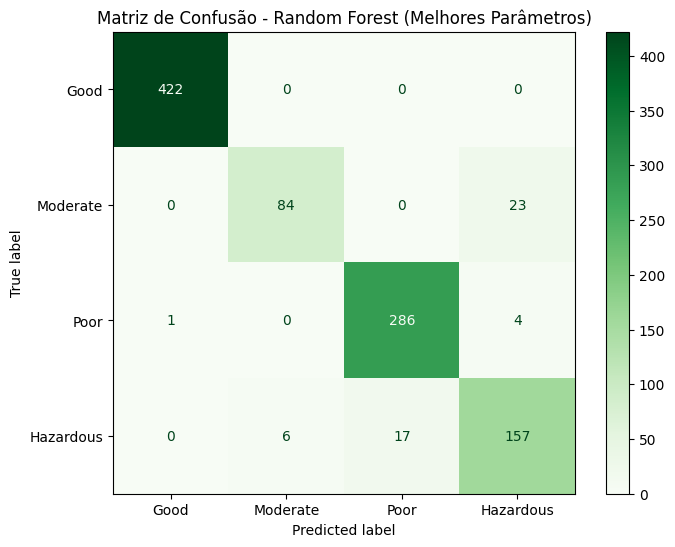

In [168]:
cm = confusion_matrix(y_test, y_final_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_classes)
fig, ax = plt.subplots(figsize = (8, 6))

disp.plot(ax = ax, cmap = 'Greens', colorbar = True)
plt.title('Matriz de Confusão - Random Forest (Melhores Parâmetros)')

plt.show()

In [169]:
# Salvando o arquivo do modelo de Random Forest com os melhores resultados do GridSearchCV:

joblib.dump(final_model, 'random_forest/random_forest_air_quality_model.joblib')

['random_forest/random_forest_air_quality_model.joblib']

### Outra abordagem: RandomizedSearchCV

O RandomizedSearchCV é uma técnica de busca de hiperparâmetros que, em vez de testar todas as combinações possíveis como o GridSearchCV, seleciona um número fixo de combinações aleatórias dentro de distribuições ou intervalos definidos para cada parâmetro. 

No código abaixo, usou-se 50 combinações aleatórias (n_iter) para otimizar o modelo em relação ao F1-score macro, que é uma métrica apropriada para tarefas de classificação multiclasse pois avalia o equilíbrio entre precision e recall para todas as classes igualmente. O uso do RandomizedSearchCV é adequado quando se deseja uma busca ampla e rápida por configurações potencialmente melhores sem o custo computacional elevado do grid completo.

In [170]:
# Definição do espaço de busca (distribuições de hiperparâmetros)
param_dist = {
    'n_estimators': randint(50, 300),        # número de árvores
    'max_depth': randint(5, 50),             # profundidade máxima
    'min_samples_split': randint(2, 20),     # min amostras para split
    'min_samples_leaf': randint(1, 10),      # min amostras por folha
    'bootstrap': [True, False]               # com ou sem bootstrap
}

In [171]:
rf = RandomForestClassifier(random_state = 34)

# RandomizedSearchCV para 50 iterações
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist,
    n_iter = 50,                      # 50 combinações aleatórias
    cv = 5,                           # 5-fold cross-validation
    scoring = 'f1_macro',             # otimiza F1-score macro
    random_state = 42,
    n_jobs = -1,                      # usa todos os núcleos da cpu
    verbose = 2
)

random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", random_search.best_params_)
print(f"Melhor F1-score médio (cross-validation): {random_search.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: {'bootstrap': False, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 107}
Melhor F1-score médio (cross-validation): 93.58%


In [172]:
best_random_model = random_search.best_estimator_
y_random_pred = best_random_model.predict(X_test)

# Métricas de avaliação no conjunto de teste
accuracy_r = accuracy_score(y_test, y_random_pred)
precision_r = precision_score(y_test, y_random_pred, average = 'macro')
recall_r = recall_score(y_test, y_random_pred, average = 'macro')
f1_r = f1_score(y_test, y_random_pred, average = 'macro')

print("\n=== Resultados no conjunto de teste ===")
print(f"Acurácia:  {accuracy_r * 100:.2f}%")
print(f"Precisão:  {precision_r * 100:.2f}%")
print(f"Recall:    {recall_r * 100:.2f}%")
print(f"F1-Score:  {f1_r * 100:.2f}%")


=== Resultados no conjunto de teste ===
Acurácia:  95.30%
Precisão:  93.58%
Recall:    91.94%
F1-Score:  92.67%


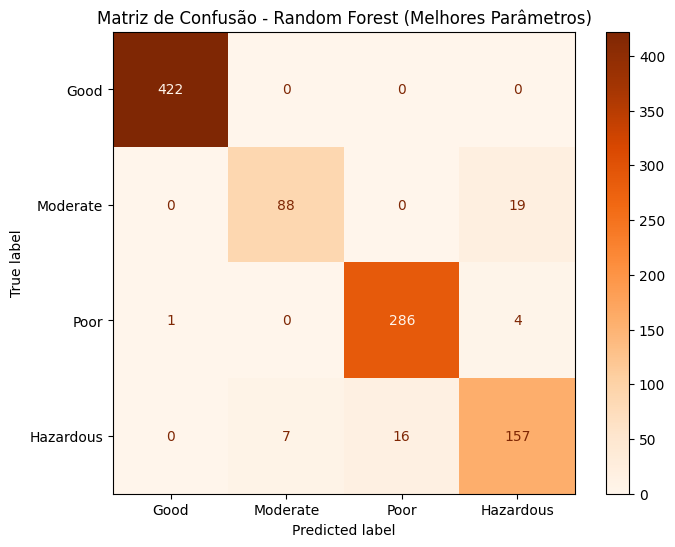

In [173]:
cm = confusion_matrix(y_test, y_random_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_classes)
fig, ax = plt.subplots(figsize = (8, 6))

disp.plot(ax = ax, cmap = 'Oranges', colorbar = True)
plt.title('Matriz de Confusão - Random Forest (Melhores Parâmetros)')

plt.show()

In [174]:
# Salvando o arquivo do modelo de Random Forest com os melhores resultados do RandomSearchCV:
joblib.dump(best_random_model, 'random_forest/random_forest_air_quality_randomsearch.joblib')

['random_forest/random_forest_air_quality_randomsearch.joblib']

### Conclusões:

A comparação entre as três abordagens evidencia que o modelo ajustado com RandomizedSearchCV apresentou o melhor desempenho geral, superando tanto o modelo padrão do Random Forest quanto o resultado obtido com o GridSearchCV em todas as métricas avaliadas — especialmente no F1-score macro, que reflete um melhor equilíbrio entre precisão e recall nas diferentes classes. 

A estratégia de busca aleatória do RandomizedSearchCV permitiu explorar um espaço mais amplo e encontrar uma combinação de hiperparâmetros que resultou no melhor modelo final. Assim, para este caso, o modelo treinado via RandomizedSearchCV foi o mais adequado para estimar o valor de nível de qualidade do ar.

In [175]:
data = {
    'Modelo': ['RandomForest Padrão', 'GridSearchCV', 'RandomizedSearchCV'],
    'Acurácia': [accuracy_p, accuracy_g, accuracy_r],
    'Precisão': [precision_p, precision_g, precision_r],
    'Recall': [recall_p, recall_g, recall_r],
    'F1-Score': [f1_p, f1_g, f1_r]
}

# Criar DataFrame
df_resultados = pd.DataFrame(data)

# Converter para porcentagem com duas casas decimais
colunas_metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
df_resultados[colunas_metricas] = df_resultados[colunas_metricas].applymap(lambda x: f"{x * 100:.2f}%")

# Exibir tabela
print("\n=== Comparação de Modelos ===\n")
print(df_resultados.to_string(index = False))


=== Comparação de Modelos ===

             Modelo Acurácia Precisão Recall F1-Score
RandomForest Padrão   95.10%   93.16% 91.42%   92.19%
       GridSearchCV   94.90%   93.20% 91.00%   91.93%
 RandomizedSearchCV   95.30%   93.58% 91.94%   92.67%
